In [40]:
import pandas as pd
import random

business_areas = {
    "Delivery Service": ["late delivery", "on-time delivery", "delivery delay", "early delivery"],
    "Car Condition": ["dirty car", "clean car", "engine issues", "flat tire", "scratches"],
    "Pricing and Booking": ["hidden fees", "transparent pricing", "smooth booking", "price too high", "extra charges"],
    "Customer Support": ["rude staff", "helpful support", "slow response", "great support"],
    "Other": ["fuel policy unclear", "GPS not working", "mobile app glitch"]
}

# Sample sentiments
templates = {
    "Positive": ["was good", "was excellent", "was very satisfactory", "met my expectations"],
    "Negative": ["was bad", "was late", "was disappointing", "was unacceptable"]
}

reviews = []
for area, issues in business_areas.items():
    for _ in range(30):  # ~150 reviews → 5 areas × 30 = 150
        issue = random.choice(issues)
        sentiment = random.choice(list(templates.keys()))
        remark = random.choice(templates[sentiment])
        reviews.append(f"The {issue} {remark}.")

# Build DataFrame
df = pd.DataFrame({"Review": reviews})
df.to_csv("car_rental_feedback.csv", index=False)
print("Generated 150 reviews.")


Generated 150 reviews.


In [41]:
#STEP 1
!pip install ibm-watson-machine-learning pandas matplotlib


In [42]:
#Step 2
import pandas as pd
import matplotlib.pyplot as plt
import time
import os, getpass
from ibm_watson_machine_learning.foundation_models import Model
from ibm_watson_machine_learning.metanames import GenTextParamsMetaNames as GenParams


In [43]:
#Step 3
credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": getpass.getpass("Enter your IBM Cloud API key: ")
}

# 🔍 Step 2: Get Project ID from env or input
try:
    project_id = os.environ["PROJECT_ID"]
except KeyError:
    project_id = input("Enter your Watsonx.ai Project ID: ")


Enter your IBM Cloud API key: ··········
Enter your Watsonx.ai Project ID: 672951b6-1af4-4d85-8019-b0680175c591


In [44]:
#Step 4
model = Model(
    model_id="mistralai/mistral-large",
    credentials=credentials,
    project_id=project_id
)


In [45]:
#Step 5
df = pd.read_csv("car_rental_feedback.csv")
print("Loaded", len(df), "reviews.")


Loaded 150 reviews.


In [46]:
#Step 6
def make_prompt(review):
    return f"""
You are an intelligent assistant that analyzes customer feedback.

Review: "{review}"

Identify the following:
1. Sentiment (Positive / Negative / Neutral)
2. Issue(s) mentioned (e.g., late delivery, dirty car, rude staff)
3. Business Area: Choose one of ["Car Condition", "Delivery Service", "Customer Support", "Pricing", "Other"]

Answer in this format:
Sentiment: <sentiment>
Issues: <comma-separated list of issues>
Business Area: <area>
"""

In [47]:
#Step 7
sentiments = []
issues = []
business_areas = []

for i, review in enumerate(df["Review"], 1):
    print(f"⏳ Processing {i}/{len(df)}...")
    prompt = make_prompt(review)
    response = model.generate(prompt=prompt, params={GenParams.MAX_NEW_TOKENS: 150})
    output = response['results'][0]['generated_text'].strip()

    try:
        lines = output.splitlines()
        sentiment = lines[0].replace("Sentiment:", "").strip()
        issue = lines[1].replace("Issues:", "").strip()
        area = lines[2].replace("Business Area:", "").strip()
    except:
        sentiment = "Unknown"
        issue = "Unknown"
        area = "Unknown"

    sentiments.append(sentiment)
    issues.append(issue)
    business_areas.append(area)
    time.sleep(0.5)

⏳ Processing 1/150...
⏳ Processing 2/150...
⏳ Processing 3/150...
⏳ Processing 4/150...
⏳ Processing 5/150...
⏳ Processing 6/150...
⏳ Processing 7/150...
⏳ Processing 8/150...
⏳ Processing 9/150...
⏳ Processing 10/150...
⏳ Processing 11/150...
⏳ Processing 12/150...
⏳ Processing 13/150...
⏳ Processing 14/150...
⏳ Processing 15/150...
⏳ Processing 16/150...
⏳ Processing 17/150...
⏳ Processing 18/150...
⏳ Processing 19/150...
⏳ Processing 20/150...
⏳ Processing 21/150...
⏳ Processing 22/150...
⏳ Processing 23/150...
⏳ Processing 24/150...
⏳ Processing 25/150...
⏳ Processing 26/150...
⏳ Processing 27/150...
⏳ Processing 28/150...
⏳ Processing 29/150...
⏳ Processing 30/150...
⏳ Processing 31/150...
⏳ Processing 32/150...
⏳ Processing 33/150...
⏳ Processing 34/150...
⏳ Processing 35/150...
⏳ Processing 36/150...
⏳ Processing 37/150...
⏳ Processing 38/150...
⏳ Processing 39/150...
⏳ Processing 40/150...
⏳ Processing 41/150...
⏳ Processing 42/150...
⏳ Processing 43/150...
⏳ Processing 44/150.

In [48]:
#step 8
df["Sentiment"] = sentiments
df["Issues"] = issues
df["Business Area"] = business_areas
df.to_csv("feedback_analysis_results.csv", index=False)
print("✅ Results saved to feedback_analysis_results.csv")


✅ Results saved to feedback_analysis_results.csv


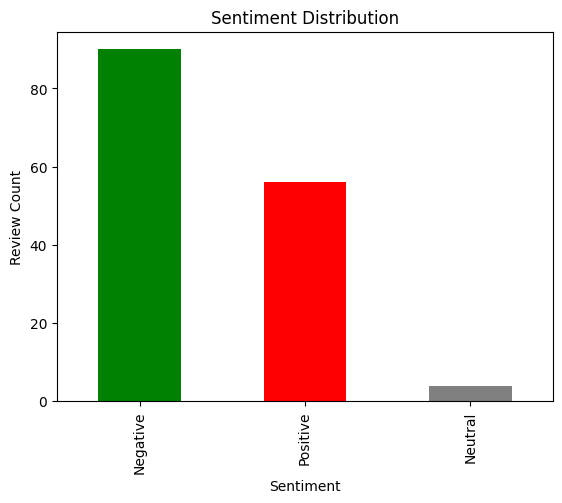

In [49]:
#Step 9
df["Sentiment"].value_counts().plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.savefig("/content/sentiment_distribution.png")
plt.show()


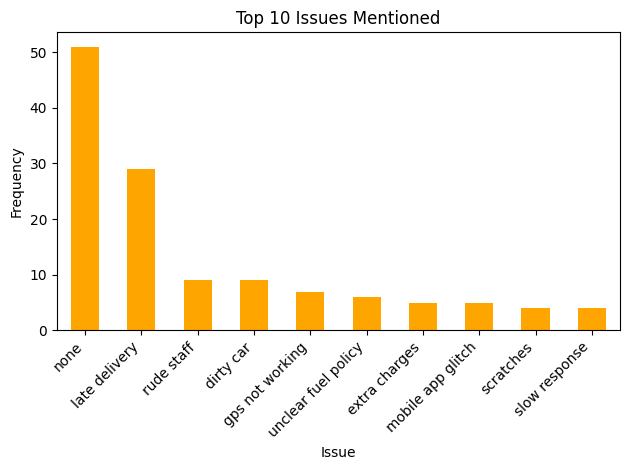

In [50]:
#Step 10
issue_freq = df["Issues"].str.lower().str.split(", ").explode().value_counts()
issue_freq.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Issues Mentioned")
plt.xlabel("Issue")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/content/top_issues.png")
plt.show()


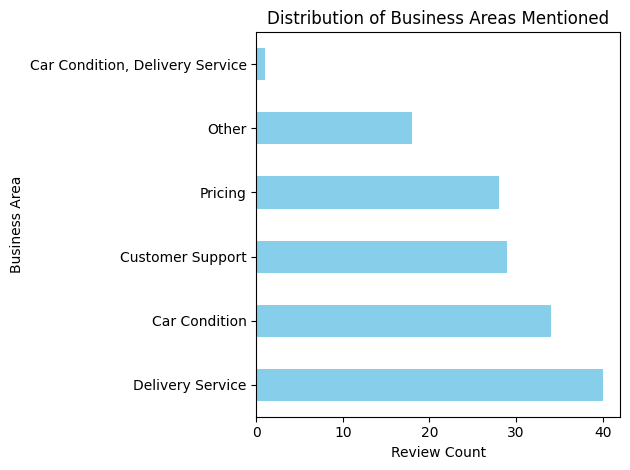

In [51]:
# ✅ STEP 11: Plot business area breakdown
df["Business Area"].value_counts().plot(kind="barh", color="skyblue")
plt.title("Distribution of Business Areas Mentioned")
plt.xlabel("Review Count")
plt.ylabel("Business Area")
plt.tight_layout()
plt.savefig("/content/business_area_distribution.png")
plt.show()


In [52]:
print(df["Sentiment"].value_counts(dropna=False))
print(df["Issues"].value_counts(dropna=False))
print(df["Business Area"].value_counts(dropna=False))

Sentiment
Negative    90
Positive    56
Neutral      4
Name: count, dtype: int64
Issues
None                                  51
late delivery                         18
rude staff                             7
dirty car                              6
GPS not working                        6
Extra charges                          5
mobile app glitch                      5
Unclear fuel policy                    4
Scratches                              4
Flat tire                              3
app glitch                             3
Late delivery                          3
Transparent pricing                    3
late                                   3
Late support                           3
Dirty car                              2
rude staff, late delivery              2
Unclear fuel policy, Late delivery     2
Poor support                           2
Slow response                          2
early delivery                         2
Late delivery, Slow response           2
High price